<h1 style="text-align:center"> Drexel University </h1>
<h2 style = "text-align:center"> College of Computing and Informatics</h2>
<h2 style = "text-align:center">INFO 212: Data Science Programming I</h2>
<h3 style = "text-align:center">Assignment 3</h3>
<div style="text-align:center; border-style:solid; padding: 10px">
<div style="font-weight:bold">Due Date: Sunday, May 13, 2018</div>
This assignment counts for 15% of the final grade
</div>

<h3 style="color:red; font-weight:bold; text-decoration: underline">DON'T FORGET TO PUT YOUR NAME BELOW</h3>

### NAME: Jasdeep Glamour


### A. Assignment Overview
This assignment provides the opportunity for you to practice with the capabilities of handling with external data in Python. 

### B. What to Hand In
	
Sumbit a completed this Jupyter notebook. 

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation. Text font size should be either 11 or 12 points.

### F. Marking Schemes:

Marking assignments will be based on several aspects: presentation, correctness and coding styles. 

For programming questions, 10% of the mark will be judged on the coding style. 

The following is a set of guidelines for the coding style in this course:
1. Write a good comment for each variable, each method, each control branch, and each loop.
2. Use appropriate indentations to indicate control flows and blocks of code. 
3. Your method comments must mention the purpose of each parameter, and must be grammatically correct. 
4. Each line must be less than 80 characters long including tabs and spaces. 
5. Put a blank space before and after every operator. 
6. When breaking up a long line, break it before an operator, not after. 

### G. Data Sets

This assignment needs the data sets specified in the questions. 

### H. Answer the following questions

#### Question 1:

Wikipedia has a Webpage: (https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population): *List of countries by past and future population*. On this page, there are three tables containing the estimated populations from 1950 to 2050 for all the countries. Read the description on the Webpage to understand the information in the tables. Follow the instructions below at each step and answer the questions to complete this question:
- Download the Webpage as an HTML file in your disk. 
- Read in the tables using Pandas' `read_html` method. Answer the following question:
 * How many tables have you read in?
- Show the first 5 rows of the DataFrame correpsonding to the table "Estimates between the years 1950 and 1980 (in thousands)"
- How many countries does the Wikipedia page list their populations?
- Create a DataFrame containing all the data from the population tables. I.e., the DataFrame contains the popultation and average annual growth data from 1950-2050. You need to combine the three population tables. 
- For the top 10 most populous countries at 1950, plot their population data from 1950-2050 (in 5-year interval). The plot should use years 1950-2050 as x axis, and population numbers as y axis. The following figure shows the expected result.
![](assignment3-question1-population.png)
- For the same top 10 most populous contries at 1950, plot the average annual growth for each previous five-year period starting from 1955 to 2050 in 5-year interval. The following figure shows the expected result. 
![](assignment3-question1-aag.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import file
tables =pd.read_html("datasets/List-population.html", header = 0)
#get number of tables
print(len(tables),'Tables have been read in.')

4 Tables have been read in.


In [3]:
#Remove Special Characters from column names 
tables[0].columns = ['Country', '1950', '1955', '1955AAG', '1960', '1960AAG',
       '1965', '1965AAG', '1970', '1970AAG', '1975', '1975AAG', '1980', '1980AAG']
tables[1].columns = ['Country', '1985', '1985AAG', '1990', '1990AAG', '1995',
       '1995AAG', '2000', '2000AAG', '2005', '2005AAG', '2010', '2010AAG', '2015', '2015AAG']
tables[2].columns = ['Country', '2020', '2020AAG', '2025', '2025AAG', '2030',
       '2030AAG', '2035', '2035AAG', '2040', '2040AAG', '2045', '2045AAG', '2050', '2050AAG']

In [4]:
#Checks if all the tables are the same size
tables[0].shape[0] == tables[1].shape[0] ==  tables[2].shape[0] 

True

In [5]:
#Displays the first five rows for data ranging from 1950 to 1980
f_five = tables[0]
f_five[:5]

,Country,1950,1955,1955AAG,1960,1960AAG,1965,1965AAG,1970,1970AAG,1975,1975AAG,1980,1980AAG
0,Afghanistan,8151,8892,1.76,9830,2.03,10998,2.27,12431,2.48,14133,2.60,15045,1.26
1,Albania,1228,1393,2.56,1624,3.12,1884,3.02,2157,2.74,2402,2.17,2672,2.16
2,Algeria,8893,9842,2.05,10910,2.08,11964,1.86,13932,3.09,16141,2.99,18807,3.10
3,American Samoa,20,20,0.72,21,0.20,25,4.23,28,2.08,30,1.68,33,1.81
4,Andorra,7,7,0.04,9,6.28,14,10.17,20,7.49,27,6.32,34,4.81


In [6]:
#Prints the number of countries Wikipedia list in their populations
num_country = tables[0]['Country'].nunique() -1
print("Wikipedia lists", num_country,"country's population")

Wikipedia lists 227 country's population


In [7]:
#concat all tables together, remove indexing column before 
df = pd.concat([tables[0], tables[1].iloc[:,1:], tables[2].iloc[:,1:]], axis= 1)
df.columns

Index(['Country', '1950', '1955', '1955AAG', '1960', '1960AAG', '1965',
       '1965AAG', '1970', '1970AAG', '1975', '1975AAG', '1980', '1980AAG',
       '1985', '1985AAG', '1990', '1990AAG', '1995', '1995AAG', '2000',
       '2000AAG', '2005', '2005AAG', '2010', '2010AAG', '2015', '2015AAG',
       '2020', '2020AAG', '2025', '2025AAG', '2030', '2030AAG', '2035',
       '2035AAG', '2040', '2040AAG', '2045', '2045AAG', '2050', '2050AAG'],
      dtype='object')

In [8]:
#get top 10 country pop in 1950 by sorting all the values by decending order
#start a slice at 1 to remove the World entry as it is a sum of all the contries
top_10 = df.iloc[df['1950'].sort_values(ascending = False)[1:11].index]
#set index to Country instead of country index
top_10.set_index('Country', inplace = True)

In [9]:
#track top ten pop in 1950, from 1950 to 2050
#get pop for each year
top_10_pop = top_10[['1950', '1955', '1960', '1965','1970','1975', '1980','1985', '1990','1995', '2000'
                    , '2005','2010', '2015', '2020', '2025','2030', '2035', '2040', '2045', '2050']]
#transform the table for plot
to_plot = top_10_pop.T


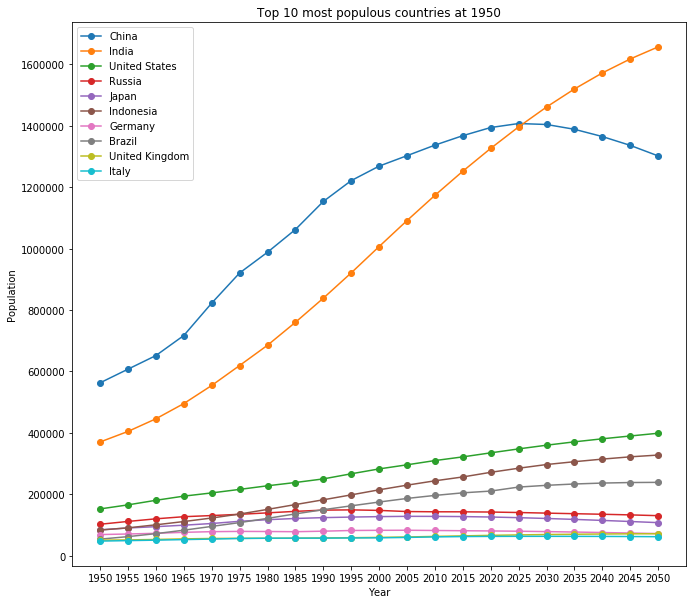

In [10]:
#plot graph 
fig = plt.figure(figsize=(11,10))
axis1 = fig.add_subplot(111)
axis1.plot(to_plot, marker = 'o')
axis1.set_title('Top 10 most populous countries at 1950')
axis1.set_ylabel('Population')
axis1.set_xlabel('Year')
axis1.legend(to_plot)

In [11]:
#AAG
top_10_AAG = df.iloc[df['1950'].sort_values(ascending = False)[1:11].index]
#set index to Country instead of country index
top_10_AAG.set_index('Country', inplace = True)

In [12]:
#track top ten AAG in 1950, from 1955 to 2050
#get AAG for each year
top_10_AAG_yr = top_10_AAG[['1955AAG', '1960AAG', '1965AAG','1970AAG','1975AAG', '1980AAG','1985AAG',
                            '1990AAG','1995AAG', '2000AAG', '2005AAG','2010AAG', '2015AAG', '2020AAG',
                            '2025AAG','2030AAG', '2035AAG', '2040AAG', '2045AAG', '2050AAG']]
#rename columns -> remove AAG from column names
top_10_AAG_yr.columns = ['1955', '1960', '1965','1970','1975', '1980','1985', '1990','1995', '2000',
                        '2005','2010', '2015', '2020', '2025','2030', '2035', '2040', '2045', '2050']

#transform the table for plot
AAG_plot = top_10_AAG_yr.T

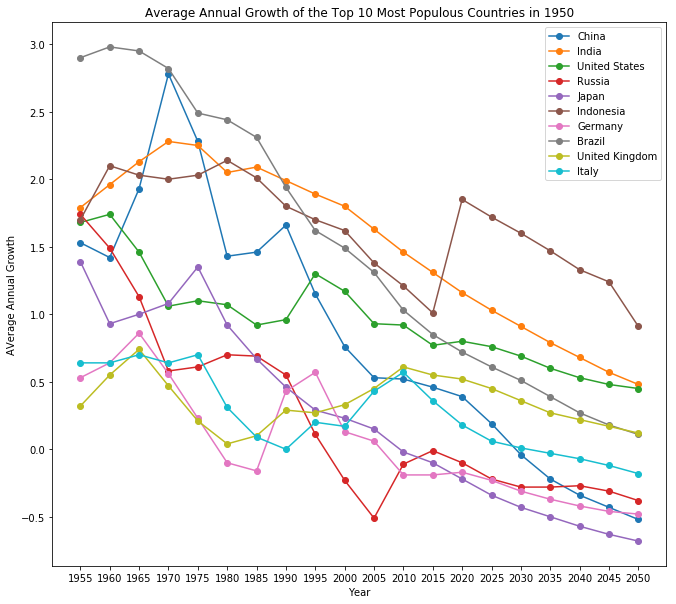

In [13]:
#plot graph 
fig = plt.figure(figsize=(11,10))
axis2 = fig.add_subplot(111)
axis2.plot(AAG_plot, marker = 'o')
axis2.set_title('Average Annual Growth of the Top 10 Most Populous Countries in 1950')
axis2.set_ylabel('AVerage Annual Growth')
axis2.set_xlabel('Year')
axis2.legend(AAG_plot)

#### Question 2:
The file `nobelprize-laureate.json` is a JSON file containing the information about Nobel Prize laureates. Create a Pandas DataFrame from the JSON file and complete the following steps:
- Answer the question: How many countries does this data set represent as the Nobel Prize laureates's birth countries?
- Plot the top-20 birth countries in a bar chart showing the country names and the number of laureats born in the countries.
![](assignment3-question2-bornCountries-bar.png)
- Plot a bar chart showing the numbers of countries where the laureates were born since 1901. 
![](assignment3-question2-bornCountry-change.png)

In [14]:
import json
laureate_json = json.load(open('datasets/nobelprize-laureate.json'))

In [15]:
#How many countries does this data set represent as the Nobel Prize laureates's birth countries?
df = (laureate_json['laureates'])
birth_country = pd.DataFrame(df)
#.unique returns one extra country? 
#unique_country = birth_country.bornCountry.unique()
unique_country = len(birth_country.bornCountry.value_counts())
print(unique_country,"unique countries are represented in this dataset")

121 unique countries are represented in this dataset


In [68]:
#Plot the top-20 birth countries in a bar chart showing the country names and the 
#number of laureats born in the countries.
top_20 = birth_country.bornCountry.value_counts().nlargest(20) 
#convert the series created by value_counts into a dataframe so it can be visualized. Otherwise the 
#plot will not be sorted
top_20_df = pd.DataFrame({'country':top_20.index, 'laureates':top_20.values})
#sort top_20 series
top_20_df.sort_values(by='laureates', axis=0, ascending=False, inplace=True)
top_20_sorted = top_20_df.reindex()

                 country  laureates
0                    USA        263
1         United Kingdom         83
2                Germany         63
3                 France         51
4                 Sweden         29
5                  Japan         25
6                 Canada         18
7        the Netherlands         18
9                 Russia         17
10                 Italy         17
8            Switzerland         17
11               Austria         14
12                Norway         12
13                 China         11
14              Scotland         11
15               Denmark         11
16             Australia         10
17          South Africa          9
18               Belgium          9
19  Germany (now Poland)          8


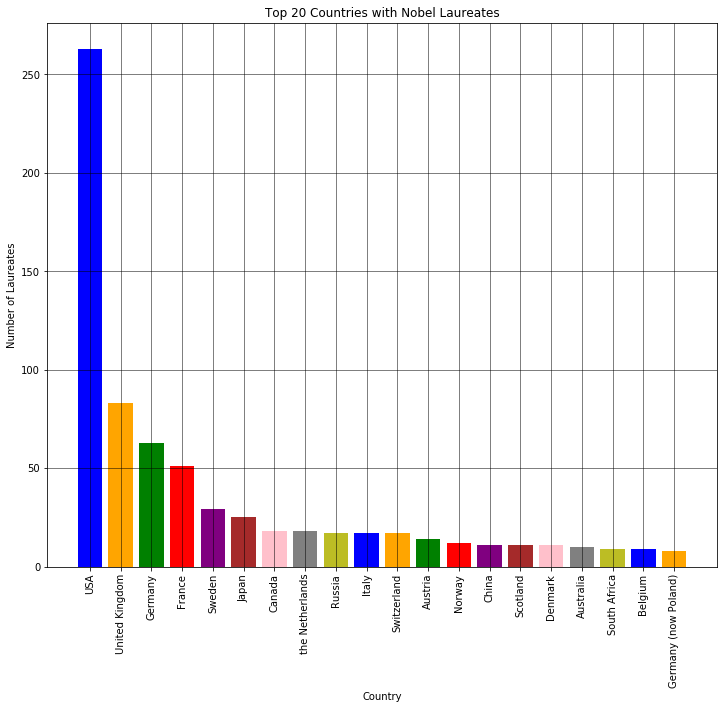

In [75]:
#plot graph 
#I'm not why but I had to sort the dataframe each time I wanted to use it to make it plot in the correct order
#otherwise it wouldn't plot in the right order, but the colors would 
fig = plt.figure(figsize=(12,10))
axis3 = fig.add_subplot(111)
axis3.bar(top_20_sorted.country.sort_values(), 
          top_20_sorted.laureates.sort_values(ascending=False), 
          color=['blue','orange','green', 'red', 'purple', 'brown','pink','grey', '#bcbd24'])
axis3.set_title('Top 20 Countries with Nobel Laureates')
axis3.set_ylabel('Number of Laureates')
axis3.set_xlabel('Country')
axis3.tick_params(axis='x', labelrotation=90)
axis3.set_xticklabels(top_20_sorted.country)
axis3.grid(color='black', linestyle='-', linewidth=.5)

In [18]:
#Plot a bar chart showing the numbers of countries where the laureates were born since 1901.
#get data
laureate_df = pd.DataFrame(laureate_json['laureates'])
#extract prize info and assign to prize_df
prize_df = pd.DataFrame([rec['prizes'][0] for rec in laureate_json['laureates']])
#add year info from prize_df as a column to laureate dataframe
laureate_year_df = pd.concat([laureate_df, prize_df['year']], axis = 1)
#create new dataframe with only bornCountry and year
country_by_year = pd.DataFrame(laureate_year_df[['bornCountry','year']])

In [19]:
#create list of each year from 1901-2017
every_year = country_by_year.year.unique()
#remove nan values
cleaned_list = [x for x in every_year if str(x) != 'nan']
#create group and group or index by year
grouped = country_by_year.groupby('year')

In [76]:
#create dict with cleaned list and list of zeros
laureate = dict(zip(cleaned_list, [0]*len(cleaned_list)))
for key in cleaned_list:
    #using the cleaned list as keys in the laureate dict save the unique birthcountries by the key which is year
    laureate[key] = [len(grouped.get_group(key).
                         bornCountry.unique())]
#convert the dict back to a dataframe for plotting     
plot_df = pd.DataFrame.from_dict(laureate,orient='index')
#flatten list from list->array->value to just value for plotting
y_values = [item for sublist in plot_df.values for item in sublist]

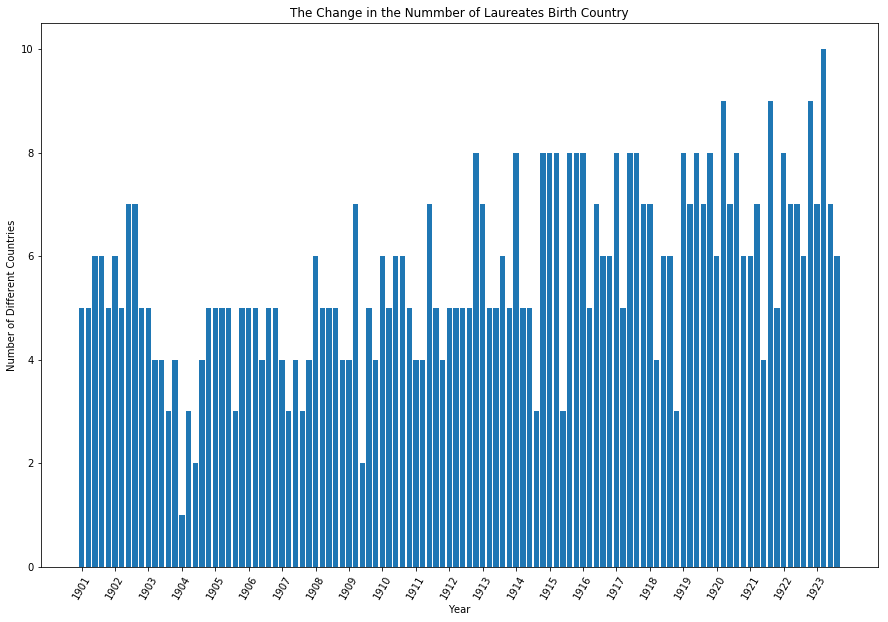

In [77]:
#plot graph 
fig = plt.figure(figsize=(15,10))
axis4 = fig.add_subplot(111)
axis4.bar(plot_df.index, y_values)
axis4.set_title('The Change in the Nummber of Laureates Birth Country')
axis4.set_ylabel('Number of Different Countries')
axis4.set_xlabel('Year')
axis4.tick_params(axis='x', labelrotation=60)
axis4.locator_params(axis='x',tight=True, nbins=23)